In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from scipy import stats
import category_encoders as ce
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.manifold import TSNE
train_data=pd.read_csv("tdata_proj_82.csv") # loading the train data file in pandas
train_data.shape # included train data labels along with train data values

(59400, 41)

In [2]:
train_data.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

From the above data information, there are 31 categorical data and 10 are numerical data features

In [4]:
train_data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

From the above result data is highly imbalanced as functional has more data points and functional needs repair has less data points.

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_group', ylabel='count'>

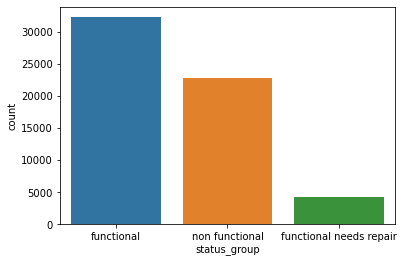

In [5]:
sb.countplot(train_data['status_group'])

In [6]:
train_data.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


For numericals features there is no strong correlation between the input variables from the above result.There is a strong correaltion of 65.9% between gps height and construiton_year. But, actually there shouldn't be realtion between those features and not considering those correlation for selectingt the features.Remaining categorical features has to be convert into numerical features and observe the correlatons among them. 

In [7]:
train_data.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

missing values are observed in Funder,Installer,Sub Village,public_meeting,Scheme_name,Scheme_management,permit columns.We can remove the rows of missing values, but, it will cause the loss of data.For categorical features replacing the missing values with frequent label and for numerical features, replacing the missing values with median will be appropriate.

In [8]:
train_data['id'].mode()

0            0
1            1
2            2
3            3
4            4
         ...  
59395    74240
59396    74242
59397    74243
59398    74246
59399    74247
Length: 59400, dtype: int64

1.From the mode operation, it is showing clearly ID is unique for all data points. Dropping the ID feature from dataset as it is not useful.

In [9]:
train_data['quantity'].equals(train_data['quantity_group'])

True

2.Removing the column quanity group as it is same data as quantity


In [10]:
train_data['recorded_by'].describe()

count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object

3.From the output of train_data['recorded_by'].describe(). It is same for all the datapoints.so,dropping this feature

In [11]:
print(train_data['num_private'].value_counts())


0      58643
6         81
1         73
8         46
5         46
       ...  
42         1
136        1
35         1
131        1
94         1
Name: num_private, Length: 65, dtype: int64


4.From the above result, 98.75% of data is same and it's value is 0. Removing this feature from data.

In [12]:
print(train_data[["extraction_type", "extraction_type_group"]].value_counts().to_markdown())

|                                                 |     0 |
|:------------------------------------------------|------:|
| ('gravity', 'gravity')                          | 26780 |
| ('nira/tanira', 'nira/tanira')                  |  8154 |
| ('other', 'other')                              |  6430 |
| ('submersible', 'submersible')                  |  4764 |
| ('swn 80', 'swn 80')                            |  3670 |
| ('mono', 'mono')                                |  2865 |
| ('india mark ii', 'india mark ii')              |  2400 |
| ('afridev', 'afridev')                          |  1770 |
| ('ksb', 'submersible')                          |  1415 |
| ('other - rope pump', 'rope pump')              |   451 |
| ('other - swn 81', 'other handpump')            |   229 |
| ('windmill', 'wind-powered')                    |   117 |
| ('india mark iii', 'india mark iii')            |    98 |
| ('cemo', 'other motorpump')                     |    90 |
| ('other - play pump', 'other handpump'

5.From the above result both the features are same.So,removing the extraction_type_group feature

In [13]:
print(train_data[["funder", "installer"]].value_counts().to_markdown())

|                                                                      |    0 |
|:---------------------------------------------------------------------|-----:|
| ('Government Of Tanzania', 'DWE')                                    | 4254 |
| ('Government Of Tanzania', 'Government')                             | 1607 |
| ('Hesawa', 'DWE')                                                    | 1296 |
| ('Danida', 'DANIDA')                                                 | 1046 |
| ('Rwssp', 'DWE')                                                     |  914 |
| ('Kkkt', 'KKKT')                                                     |  894 |
| ('0', '0')                                                           |  777 |
| ('Dhv', 'DWE')                                                       |  678 |
| ('Government Of Tanzania', 'RWE')                                    |  645 |
| ('Danida', 'DWE')                                                    |  626 |
| ('Dwsp', 'DWE')                       

6.From the above data, we can obseve that both funder and installer are similar. Data entered with some wrong spellings and capital letter.so, removing installer column from the data

In [14]:
print(train_data[["payment", "payment_type"]].value_counts().to_markdown())

|                                         |     0 |
|:----------------------------------------|------:|
| ('never pay', 'never pay')              | 25348 |
| ('pay per bucket', 'per bucket')        |  8985 |
| ('pay monthly', 'monthly')              |  8300 |
| ('unknown', 'unknown')                  |  8157 |
| ('pay when scheme fails', 'on failure') |  3914 |
| ('pay annually', 'annually')            |  3642 |
| ('other', 'other')                      |  1054 |


7.From the above result both the features are same.So,removing the payment_type feature

In [15]:
print(train_data[["water_quality", "quality_group"]].value_counts().to_markdown())

|                                    |     0 |
|:-----------------------------------|------:|
| ('soft', 'good')                   | 50818 |
| ('salty', 'salty')                 |  4856 |
| ('unknown', 'unknown')             |  1876 |
| ('milky', 'milky')                 |   804 |
| ('coloured', 'colored')            |   490 |
| ('salty abandoned', 'salty')       |   339 |
| ('fluoride', 'fluoride')           |   200 |
| ('fluoride abandoned', 'fluoride') |    17 |


8.From the above result both the features are same.soft and good are used for classification.So,removing the quality_group feature

In [16]:
print(train_data[["source", "source_type"]].value_counts().to_markdown())

|                                                  |     0 |
|:-------------------------------------------------|------:|
| ('spring', 'spring')                             | 17021 |
| ('shallow well', 'shallow well')                 | 16824 |
| ('machine dbh', 'borehole')                      | 11075 |
| ('river', 'river/lake')                          |  9612 |
| ('rainwater harvesting', 'rainwater harvesting') |  2295 |
| ('hand dtw', 'borehole')                         |   874 |
| ('lake', 'river/lake')                           |   765 |
| ('dam', 'dam')                                   |   656 |
| ('other', 'other')                               |   212 |
| ('unknown', 'other')                             |    66 |


9.From the above result both the features are same.So,removing the source_type feature

In [17]:
print(train_data[["waterpoint_type", "waterpoint_type_group"]].value_counts().to_markdown())

|                                                       |     0 |
|:------------------------------------------------------|------:|
| ('communal standpipe', 'communal standpipe')          | 28522 |
| ('hand pump', 'hand pump')                            | 17488 |
| ('other', 'other')                                    |  6380 |
| ('communal standpipe multiple', 'communal standpipe') |  6103 |
| ('improved spring', 'improved spring')                |   784 |
| ('cattle trough', 'cattle trough')                    |   116 |
| ('dam', 'dam')                                        |     7 |


10.From the above result both the features are same.So,removing the waterpoint_type_group feature

In [18]:
train_data['date_recorded'].describe()

count         59400
unique          356
top       3/15/2011
freq            572
Name: date_recorded, dtype: object

11.Date Recorded will have no impact on predicting the faulty pump.Even though there is a correlation, but it won't be a causation. So, removing this feature for modelling

In [19]:
print(train_data[["region", "region_code"]].value_counts().to_markdown())

|                      |    0 |
|:---------------------|-----:|
| ('Iringa', 11)       | 5294 |
| ('Shinyanga', 17)    | 4956 |
| ('Mbeya', 12)        | 4639 |
| ('Kilimanjaro', 3)   | 4379 |
| ('Morogoro', 5)      | 4006 |
| ('Kagera', 18)       | 3316 |
| ('Mwanza', 19)       | 3047 |
| ('Arusha', 2)        | 3024 |
| ('Kigoma', 16)       | 2816 |
| ('Ruvuma', 10)       | 2640 |
| ('Tanga', 4)         | 2513 |
| ('Dodoma', 1)        | 2201 |
| ('Singida', 13)      | 2093 |
| ('Mara', 20)         | 1969 |
| ('Tabora', 14)       | 1959 |
| ('Rukwa', 15)        | 1808 |
| ('Pwani', 6)         | 1609 |
| ('Manyara', 21)      | 1583 |
| ('Lindi', 80)        | 1238 |
| ('Pwani', 60)        | 1025 |
| ('Mtwara', 90)       |  917 |
| ('Dar es Salaam', 7) |  805 |
| ('Mtwara', 99)       |  423 |
| ('Mtwara', 9)        |  390 |
| ('Arusha', 24)       |  326 |
| ('Lindi', 8)         |  300 |
| ('Mwanza', 17)       |   55 |
| ('Tanga', 5)         |   34 |
| ('Shinyanga', 14)    |   20 |
| ('Lind

12.From the above table, we can conclude that region is encoded with region_code. As it is given unique code for each region. Based on that Region will be removed for modelling.

In [20]:
print(train_data[["extraction_type", "extraction_type_class"]].value_counts().to_markdown())

|                                           |     0 |
|:------------------------------------------|------:|
| ('gravity', 'gravity')                    | 26780 |
| ('nira/tanira', 'handpump')               |  8154 |
| ('other', 'other')                        |  6430 |
| ('submersible', 'submersible')            |  4764 |
| ('swn 80', 'handpump')                    |  3670 |
| ('mono', 'motorpump')                     |  2865 |
| ('india mark ii', 'handpump')             |  2400 |
| ('afridev', 'handpump')                   |  1770 |
| ('ksb', 'submersible')                    |  1415 |
| ('other - rope pump', 'rope pump')        |   451 |
| ('other - swn 81', 'handpump')            |   229 |
| ('windmill', 'wind-powered')              |   117 |
| ('india mark iii', 'handpump')            |    98 |
| ('cemo', 'motorpump')                     |    90 |
| ('other - play pump', 'handpump')         |    85 |
| ('walimi', 'handpump')                    |    48 |
| ('climax', 'motorpump')   

In [21]:
train_data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

13.Extrataction type and extaction_type_class are belongs to same type of category. Extraction_type has more classes compared to other. So, removing the feature extraction_type from the dataset, as it creates overfitting.

In [22]:
print(train_data[["management", "management_group"]].value_counts().to_markdown())

|                                    |     0 |
|:-----------------------------------|------:|
| ('vwc', 'user-group')              | 40507 |
| ('wug', 'user-group')              |  6515 |
| ('water board', 'user-group')      |  2933 |
| ('wua', 'user-group')              |  2535 |
| ('private operator', 'commercial') |  1971 |
| ('parastatal', 'parastatal')       |  1768 |
| ('water authority', 'commercial')  |   904 |
| ('other', 'other')                 |   844 |
| ('company', 'commercial')          |   685 |
| ('unknown', 'unknown')             |   561 |
| ('other - school', 'other')        |    99 |
| ('trust', 'commercial')            |    78 |


In [23]:
train_data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [24]:
train_data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

From the above table, 88% of data is sub-categorised as user-group. It is biased towards user-group. So, removing this feature from dataset

In [25]:
print(train_data[["management", "scheme_management"]].value_counts().to_markdown())

|                                          |     0 |
|:-----------------------------------------|------:|
| ('vwc', 'VWC')                           | 35388 |
| ('wug', 'WUG')                           |  4768 |
| ('wua', 'WUA')                           |  2369 |
| ('water board', 'Water Board')           |  2159 |
| ('parastatal', 'Parastatal')             |  1568 |
| ('vwc', 'Water authority')               |  1297 |
| ('private operator', 'Private operator') |   963 |
| ('water authority', 'Water authority')   |   867 |
| ('wug', 'VWC')                           |   823 |
| ('water board', 'Water authority')       |   730 |
| ('company', 'Company')                   |   674 |
| ('other', 'Other')                       |   519 |
| ('vwc', 'Water Board')                   |   411 |
| ('vwc', 'WUG')                           |   401 |
| ('vwc', 'WUA')                           |   238 |
| ('private operator', 'Company')          |   224 |
| ('private operator', 'WUA')              |  

14.management and Scheme_management are similar from the above table. So removing scheme_managment column fromt the dataset

In [26]:
print(train_data[["waterpoint_type", "extraction_type_class"]].value_counts().to_markdown())

|                                                 |     0 |
|:------------------------------------------------|------:|
| ('communal standpipe', 'gravity')               | 22121 |
| ('hand pump', 'handpump')                       | 16283 |
| ('other', 'other')                              |  4739 |
| ('communal standpipe', 'submersible')           |  4011 |
| ('communal standpipe multiple', 'gravity')      |  2657 |
| ('communal standpipe multiple', 'submersible')  |  1886 |
| ('communal standpipe', 'motorpump')             |  1560 |
| ('communal standpipe multiple', 'motorpump')    |  1291 |
| ('other', 'gravity')                            |  1197 |
| ('hand pump', 'other')                          |   689 |
| ('improved spring', 'gravity')                  |   632 |
| ('communal standpipe', 'other')                 |   627 |
| ('hand pump', 'rope pump')                      |   386 |
| ('other', 'submersible')                        |   233 |
| ('communal standpipe multiple', 'other

From the above tabular comparison, there are some sub categories matching with each other. ater feature encoding finding the correlation coefficient will ensures the feature selection among these features

In [27]:
train_data['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [28]:
train_data['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [29]:
train_data['region_code'].corr(train_data['district_code'])


0.678602306788798

15.there is a correlation between the region_code and district_code. district_code has less no.of sub categories .So, removing region_code feature

In [30]:
print(train_data[["amount_tsh", "status_group"]].value_counts().to_markdown())

|                                       |     0 |
|:--------------------------------------|------:|
| (0.0, 'functional')                   | 19706 |
| (0.0, 'non functional')               | 18885 |
| (0.0, 'functional needs repair')      |  3048 |
| (500.0, 'functional')                 |  2226 |
| (50.0, 'functional')                  |  1634 |
| (1000.0, 'functional')                |  1121 |
| (20.0, 'functional')                  |   970 |
| (200.0, 'functional')                 |   789 |
| (50.0, 'non functional')              |   731 |
| (10.0, 'functional')                  |   623 |
| (500.0, 'non functional')             |   602 |
| (100.0, 'functional')                 |   557 |
| (30.0, 'functional')                  |   528 |
| (2000.0, 'functional')                |   522 |
| (20.0, 'non functional')              |   417 |
| (300.0, 'functional')                 |   358 |
| (5000.0, 'functional')                |   354 |
| (5.0, 'functional')                   |   330 |


From the above table, 33% of data with amount of water head is 0 and it is functional. Practically without water availability functioning is not possible.So, removing thsi data.

In [31]:
train_data=train_data.drop(columns=['recorded_by','id','quantity_group','num_private','payment_type','extraction_type_group','quality_group','source_type','waterpoint_type_group','date_recorded','region','region_code','extraction_type','scheme_management','installer','amount_tsh','management_group']) 
train_data.shape


(59400, 24)

Univariate Analaysis:
1.1D scatter plots
2.Histogram
3.PDF
4.CDF
5.Statistical Measures (Mean,Variance,Standard Deviation,Perncentile,IQR

<AxesSubplot:xlabel='population'>

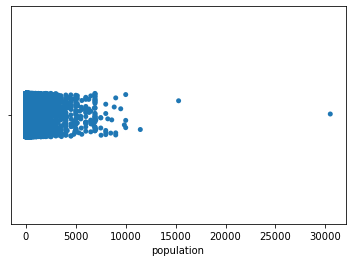

In [32]:
sb.stripplot(data=train_data,x="population",hue="status_group")

Scatter plots can able to represent the large quantity of data. In the above scatter plot, more data points are overlapped in the range of 0 to 7500 for population feature. We cannot draw any results using 1D scatter plot due to overlapping

In 1D scatter plot, we can observe many overlap of points between functional, non-functional and functional needs repair.So, it is not usefulf or selecting the right features for model

<AxesSubplot:xlabel='quantity', ylabel='count'>

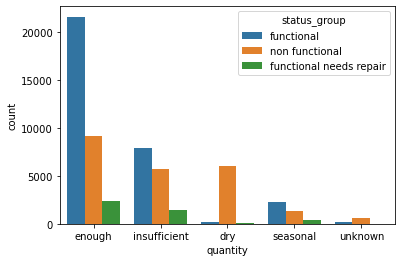

In [33]:
sb.countplot(data=train_data, x='quantity',hue='status_group')

From the above plot we can observe that, water with enough qunatity are functioning well and dry quantity water are non functional.

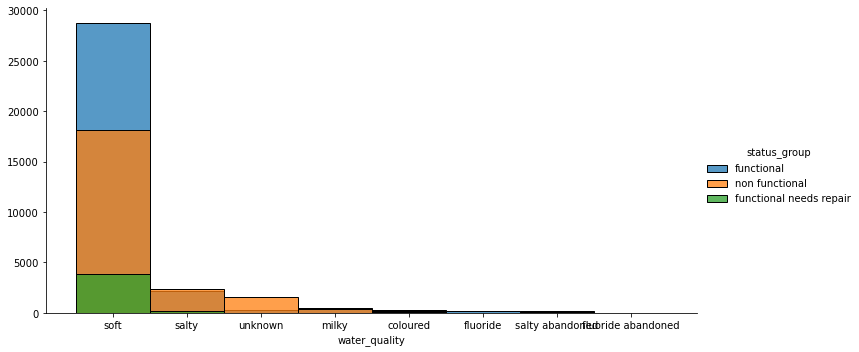

In [34]:
sb.FacetGrid(train_data, hue='status_group', height=5, aspect=2).map(sb.histplot, "water_quality").add_legend()
plt.show()

From the above plot, we can observe that water with soft quality are more functional.

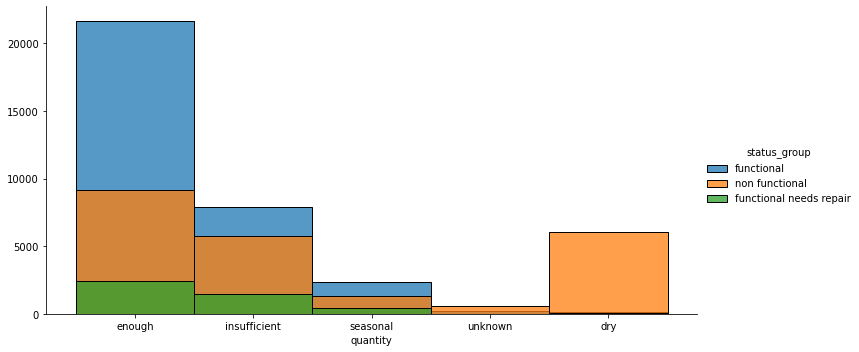

In [35]:
sb.FacetGrid(train_data, hue='status_group', height=5, aspect=2).map(sb.histplot, "quantity",bins=100).add_legend()
plt.show()

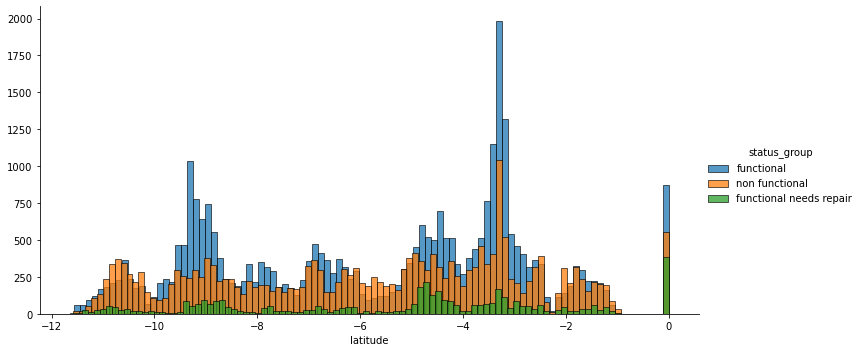

In [36]:
sb.FacetGrid(train_data, hue='status_group', height=5, aspect=2).map(sb.histplot, "latitude",bins=100).add_legend()
plt.show()

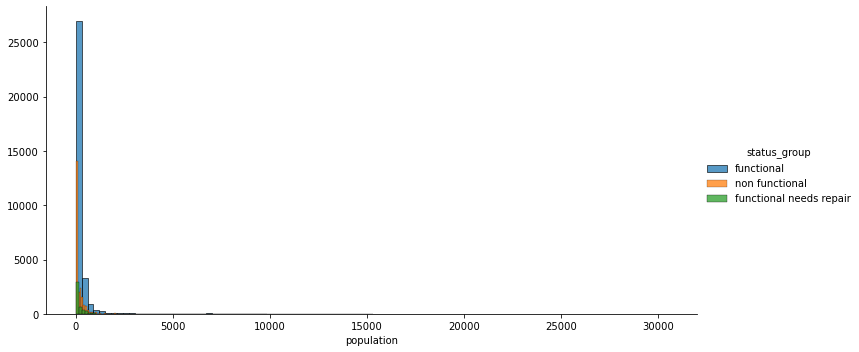

In [37]:
sb.FacetGrid(train_data, hue='status_group', height=5, aspect=2).map(sb.histplot, "population",bins=100).add_legend()
plt.show()

Observations from the above histograms. If the data points don't have the outliers, data can be analyzed using the histograms. But, histograms are clearly depending on the no.of bins and the presence of outliers.Based on that, we can conclude that histograms are not to be considered for analysis

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

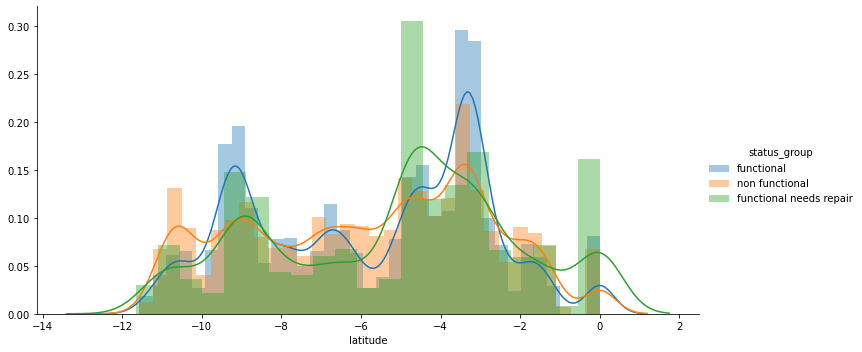

In [38]:
sb.FacetGrid(train_data, hue='status_group', height=5, aspect=2).map(sb.distplot, "latitude").add_legend()
plt.show()

PDF will give the probability of the points falling in intervals. It is better version of histogram. Using the PDF we cannot able to find out the outliers present in the data.From the above plot, more % of latitude points ,i.e 32% points are lies in the interval of -5 to -4. <1% points are lies in the interval  of -24 to -12

<AxesSubplot:xlabel='population', ylabel='Count'>

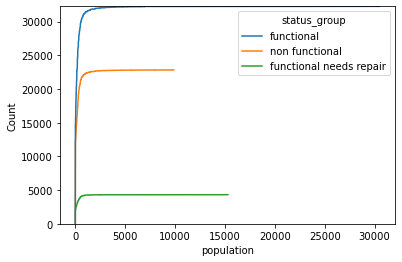

In [39]:
sb.ecdfplot(data=train_data,x="population",hue="status_group",stat="count")


Using the CDF plot, data points can be visualized along with their range of points falling in particular interval. From the above plot, we can able to see the most % of points interval. But, we cannot able to point out the outliers. From the CDF plot, 60% of the water points are with a population of 40.

<AxesSubplot:xlabel='construction_year'>

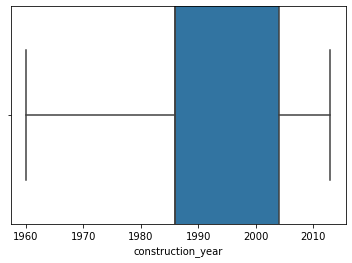

In [84]:
sb.boxplot(data=train_data,x='construction_year',width=1.2, fliersize=7)


Irrespective of the distribution of the data, box plot will gives the visualization of data into 5 statistical points as minimum point, lower quartile, median, upper quintile and maximum point. Outliers can be detected using box plot by multiplying with 1.5 times of IQR and can be eliminated from the dataset. Box plot cannot able to represent the dataset distribution. 

<AxesSubplot:xlabel='status_group', ylabel='construction_year'>

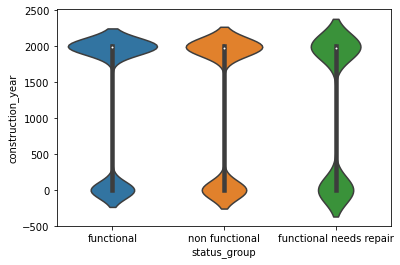

In [41]:
sb.violinplot(x=train_data['status_group'],y=train_data['construction_year'])

Along with the statistical points and outliers detection, violin plot also provides the distribution of data points in the dataset. From the violin plot, it is a non-Gaussian distribution.

In [42]:
train_data['wpt_name'].value_counts()

none                3563
Shuleni             1748
Zahanati             830
Msikitini            535
Kanisani             323
                    ... 
Kwa Mzee Hwero         1
Nyalele                1
Mkobeni                1
Kwa Mzee Walesi        1
Kwa Steven Mlawi       1
Name: wpt_name, Length: 37400, dtype: int64

In [43]:
train_data['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [44]:
train_data['ward'].value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Themi                 1
Kinungu               1
Mwanga Kaskazini      1
Burungura             1
Mkumbi                1
Name: ward, Length: 2092, dtype: int64

In [45]:
train_data['subvillage'].value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
                 ... 
Ngongoele           1
Usia                1
Matiganjola Ka      1
Kamushenge          1
Itonjamoto          1
Name: subvillage, Length: 19287, dtype: int64

In [46]:
train_data['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

categorcial featrures wpt_name, basin, lga,ward, sub_village all will represent about the geographical location of the water point.Among all the features basin has the less no.of sub categories.So, dropping the remaining features from the dataset

In [47]:
train_data=train_data.drop(columns=['wpt_name','ward','subvillage','lga'])
train_data.shape

(59400, 20)

Encoding Features: Firstly converting the target labels with label encoder


In [48]:
label_encoder = preprocessing.LabelEncoder()
train_data['status_group']= label_encoder.fit_transform(train_data['status_group']) 
print(train_data['status_group'].value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64


In [49]:
mu, sigma = 0, 0.05 # mean and % of noise for adding noise

In [50]:
encoder= ce.TargetEncoder(cols=['permit'],min_samples_leaf=40, smoothing=10) # Target encoding parameters
train_data['permit']= encoder.fit_transform(train_data['permit'],train_data['status_group']) # fitting model with the categorical column and target variable
noise = np.random.normal(mu, sigma, [59400])
train_data['permit']=noise+train_data['permit']

TargetEncoding method is chosen to avoid the sparsity and avoid the higher dimensionality and also to avoid the models overfitting gaussian noise of 5% is added to all encoded columns of tragetencoder.

In [51]:
encoder= ce.TargetEncoder(cols=['public_meeting'],min_samples_leaf=40, smoothing=10)
train_data['public_meeting']= encoder.fit_transform(train_data['public_meeting'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['public_meeting']=noise+train_data['public_meeting']


In [52]:
encoder= ce.TargetEncoder(cols=['water_quality'],min_samples_leaf=40, smoothing=10)
train_data['water_quality']= encoder.fit_transform(train_data['water_quality'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['water_quality']=noise+train_data['water_quality']


In [53]:
encoder= ce.TargetEncoder(cols=['quantity'],min_samples_leaf=40, smoothing=10)
train_data['quantity']= encoder.fit_transform(train_data['quantity'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['quantity']=noise+train_data['quantity']

Multivariate Analysis

<AxesSubplot:xlabel='population', ylabel='quantity'>

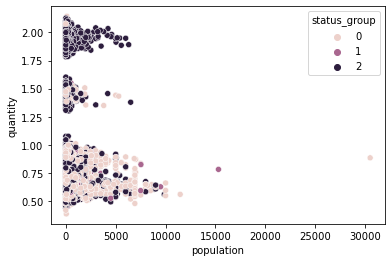

In [54]:
sb.scatterplot(data=train_data, x="population", y="quantity", hue="status_group")

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  int32  
 1   funder                 55765 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   population             59400 non-null  int64  
 8   public_meeting         59400 non-null  float64
 9   scheme_name            31234 non-null  object 
 10  permit                 59400 non-null  float64
 11  construction_year      59400 non-null  int64  
 12  extraction_type_class  59400 non-null  object 
 13  management             59400 non-null  object 
 14  payment                59400 non-null  object 
 15  wa

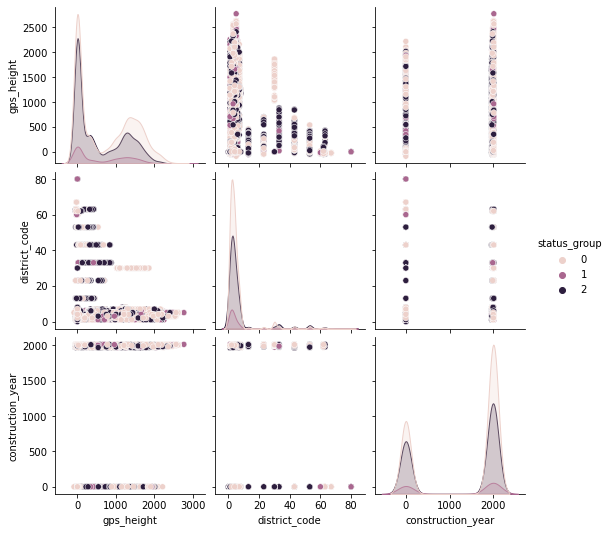

In [56]:
x=train_data.iloc[:,[0,2,6,11,17]]
sb.pairplot(x,hue="status_group",height=2.5,aspect=1)
plt.show()

From the above pair plot with different numerical features, most of the pair of features are overlapping due to the more data points present in it. Increasing the scale of the plot and visualizing is difficult using pairplot. so, for feature selection pairplot is not useful if the datapoints are more.

In [57]:
encoder= ce.TargetEncoder(cols=['waterpoint_type'],min_samples_leaf=40, smoothing=10)
train_data['waterpoint_type']= encoder.fit_transform(train_data['waterpoint_type'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['waterpoint_type']=noise+train_data['waterpoint_type']

In [58]:
encoder= ce.TargetEncoder(cols=['source_class'],min_samples_leaf=40, smoothing=10)
train_data['source_class']= encoder.fit_transform(train_data['source_class'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['source_class']=noise+train_data['source_class']

In [59]:
encoder= ce.TargetEncoder(cols=['source'],min_samples_leaf=40, smoothing=10)
train_data['source']= encoder.fit_transform(train_data['source'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['source']=noise+train_data['source']

In [60]:
encoder= ce.TargetEncoder(cols=['payment'],min_samples_leaf=40, smoothing=10)
train_data['payment']= encoder.fit_transform(train_data['payment'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['payment']=noise+train_data['payment']

In [61]:
encoder= ce.TargetEncoder(cols=['management'],min_samples_leaf=40, smoothing=10)
train_data['management']= encoder.fit_transform(train_data['management'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['management']=noise+train_data['management']

In [62]:
encoder= ce.TargetEncoder(cols=['extraction_type_class'],min_samples_leaf=40, smoothing=10)
train_data['extraction_type_class']= encoder.fit_transform(train_data['extraction_type_class'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['extraction_type_class']=noise+train_data['extraction_type_class']

In [63]:
encoder= ce.TargetEncoder(cols=['basin'],min_samples_leaf=40, smoothing=10)
train_data['basin']= encoder.fit_transform(train_data['basin'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['basin']=noise+train_data['basin']

In [64]:
encoder= ce.TargetEncoder(cols=['funder'],min_samples_leaf=40, smoothing=10)
train_data['funder']= encoder.fit_transform(train_data['funder'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['funder']=noise+train_data['funder']

In [65]:
encoder= ce.TargetEncoder(cols=['scheme_name'],min_samples_leaf=50, smoothing=10)
train_data['scheme_name']=encoder.fit_transform(train_data['scheme_name'],train_data['status_group'])
noise = np.random.normal(mu, sigma, [59400])
train_data['scheme_name']=noise+train_data['scheme_name']

In [66]:
train_data['population'].fillna(0)
train_data['population']=train_data['population'].replace(0,train_data['population'].median())


assigining the missing values with median of the data for the population feature is appropriate. We cannot assign population with zero, as population in a region cannot be zero.

In [67]:
train_data['construction_year']=train_data['construction_year'].replace(0,train_data['construction_year'].median())
train_data['construction_year'].describe()

count    59400.000000
mean      1993.044293
std         11.308410
min       1960.000000
25%       1986.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

assigining the missing values with median of the data for the construction_year feature is appropriate. We cannot assign population with zero, as construction_year cannot be zero. As per the abve information, outliers are not presetn in construction_year feature

<AxesSubplot:>

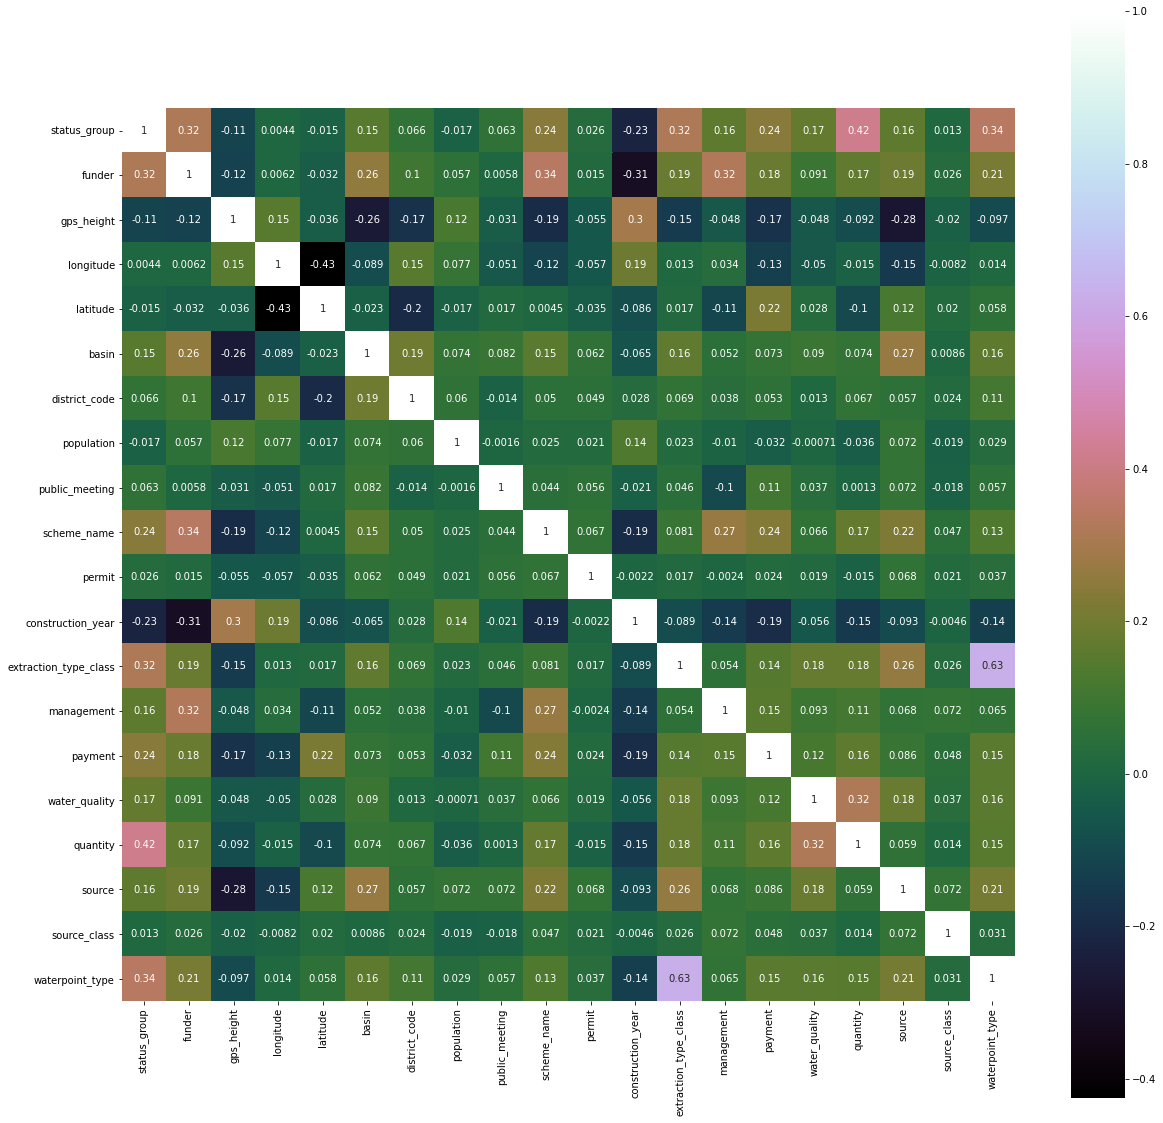

In [68]:
plt.figure(figsize=(20,20))
sb.heatmap(train_data.corr(),vmax=1, square=True,annot=True,cmap='cubehelix')

Form the correlation heat map there is a correlation between gps_height and construction_year. But, practically there is no relation between them. so, not considering that realtion

In [69]:
train_data.shape

(59400, 20)

PCA-Prinicipal Component Analysis

In [70]:
x=train_data.drop(columns=['status_group'])
y=train_data['status_group']
stand = StandardScaler()
train_stand=pd.DataFrame(stand.fit_transform(x), columns=x.columns)
train_stand.head()


,funder,gps_height,longitude,latitude,basin,district_code,population,public_meeting,scheme_name,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,source_class,waterpoint_type
0,-2.085236,1.041252,0.131052,-1.408791,-0.790454,-0.065370,-0.170677,0.485933,-3.761251,-0.333594,0.526666,-0.570705,0.917959,-1.841479,-0.109953,-0.627011,-0.967477,0.595272,-0.402207
1,-1.271704,1.054237,0.094610,1.207934,0.722264,-0.376781,0.194562,1.827018,-0.032667,0.016245,1.499402,-0.590146,-1.002674,0.653767,-0.203051,0.050989,-1.250281,-2.020653,-0.561762
2,-0.340681,0.025541,0.515158,0.639751,-0.346604,-0.169174,0.130485,-0.184617,-0.132924,0.279882,1.410971,-0.517619,0.506450,-1.266911,-0.377210,-0.601860,2.194032,-2.217931,0.791102
3,-0.153871,-0.584751,0.671308,-1.849720,2.360359,5.955245,-0.279609,0.130273,0.208185,0.628939,-0.622930,0.474254,0.921515,0.597752,-0.334243,2.848592,1.601933,0.632144,1.105471
4,-0.308356,-0.964200,-0.448669,1.317271,0.154684,-0.480585,-0.350093,-0.188058,0.133611,0.574825,-0.622930,-0.735420,-0.303111,0.604643,-0.316042,-0.080260,-1.101354,-1.863832,-0.658456


Before performing the principal component analysis all the features in the dataset standardized to bring the all features with zero mean and unit standard deviation

In [71]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(train_stand))

In [72]:
variance=pca.explained_variance_ratio_

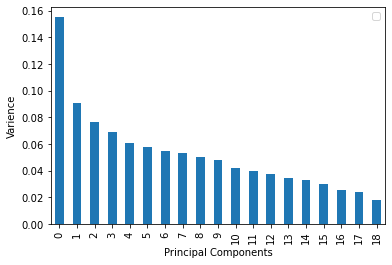

In [73]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Varience');

From the principal component analysis 16 prinicipal components are holding the 91% of the data.

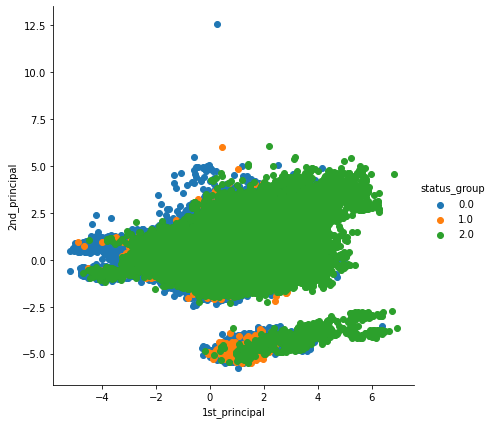

In [74]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(train_stand)
pca_data = np.vstack((pca_data.T, y)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "status_group"))
sb.FacetGrid(pca_df, hue="status_group", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

From the above plot principal components vs variance, out of 84 principal components some are holding the higher variance of the data and some are having less variance of the data. 

F:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


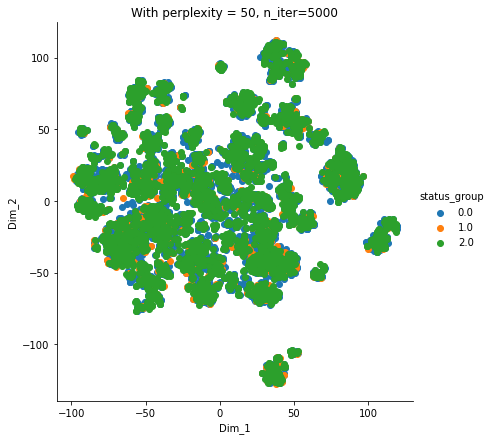

In [75]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000,n_jobs=-1,init='pca',learning_rate='auto')
tsne_data = model.fit_transform(train_stand.sample(10000))
tsne_data = np.vstack((tsne_data.T, y[0:10000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "status_group"))
sb.FacetGrid(tsne_df, hue="status_group", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

In [76]:
train_data.to_csv('phase2_output.csv')